## This script contains:
#### 1. Library and data import
#### 2. Data preparation
#### 3. Decision Tree

## 1. Library and data import

In [2]:
#import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import os
import operator
import matplotlib.pyplot as plt
import scipy
from sklearn import datasets
from sklearn import metrics
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.neighbors import KNeighborsClassifier
from sklearn.multioutput import MultiOutputClassifier
from sklearn import tree
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from matplotlib.pyplot import figure

In [4]:
# defining the path
path = r'C:\users\localadmin\Machine Learning\Data Sets'

In [6]:
#Importing scaled climate data as df
df = pd.read_csv(os.path.join(path, 'Processed Data', '[DATASET]_scaled.csv'))

In [8]:
# importing original climate data (un-scaled data) as df_og and proceed to check the head of the dataframe
df_og = pd.read_csv(os.path.join(path, 'Original Data', 'Dataset-weather-prediction-dataset-processed.csv'))

In [10]:
#importing pleasant weather dataset as dfp
dfp =  pd.read_csv(os.path.join(path, 'Original Data', 'Dataset-Answers-Weather_Prediction_Pleasant_Weather.csv'))

### 2. Data Preparation

In [12]:
#dropping unrelated weather stations data from main dataset
df_og=df_og.drop(columns=['GDANSK_cloud_cover',
 'GDANSK_humidity',
 'GDANSK_precipitation',
 'GDANSK_snow_depth',
 'GDANSK_temp_mean',
 'GDANSK_temp_min',
 'GDANSK_temp_max','ROMA_cloud_cover',
 'ROMA_wind_speed',
 'ROMA_humidity',
 'ROMA_pressure',
 'ROMA_sunshine',
 'ROMA_temp_mean','TOURS_wind_speed',
 'TOURS_humidity',
 'TOURS_pressure',
 'TOURS_global_radiation',
 'TOURS_precipitation',
 'TOURS_temp_mean',
 'TOURS_temp_min',
 'TOURS_temp_max'])

In [14]:
df_og.head()

,DATE,MONTH,BASEL_cloud_cover,BASEL_wind_speed,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_snow_depth,BASEL_sunshine,...,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_snow_depth,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
0,19600101,1,7,2.1,0.85,1.018,0.32,0.09,0,0.7,...,5,0.88,1.0003,0.45,0.34,0,4.7,8.5,6.0,10.9
1,19600102,1,6,2.1,0.84,1.018,0.36,1.05,0,1.1,...,7,0.91,1.0007,0.25,0.84,0,0.7,8.9,5.6,12.1
2,19600103,1,8,2.1,0.90,1.018,0.18,0.30,0,0.0,...,7,0.91,1.0096,0.17,0.08,0,0.1,10.5,8.1,12.9
3,19600104,1,3,2.1,0.92,1.018,0.58,0.00,0,4.1,...,7,0.86,1.0184,0.13,0.98,0,0.0,7.4,7.3,10.6
4,19600105,1,6,2.1,0.95,1.018,0.65,0.14,0,5.4,...,3,0.80,1.0328,0.46,0.00,0,5.7,5.7,3.0,8.4


In [19]:
#Create an 'X' and y df by dropping the unneeded columns.
X = df_og.drop(['DATE', 'MONTH'], axis=1)
y = dfp.drop(['DATE'],axis=1)

In [22]:
#Split data into training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=37)

## 3. Decision Tree

[Text(0.3699866526930056, 0.9827586206896551, 'x[49] <= 17.95\ngini = 0.314\nsamples = 17212\nvalue = [[12978, 4234]\n[11216, 5996]\n[11633, 5579]\n[13890, 3322]\n[13531, 3681]\n[13498, 3714]\n[14436, 2776]\n[12426, 4786]\n[13646, 3566]\n[9516, 7696]\n[13642, 3570]\n[14566, 2646]\n[17212, 0]\n[14295, 2917]\n[16349, 863]]'),
 Text(0.06596216793542854, 0.9482758620689655, 'x[98] <= 17.95\ngini = 0.099\nsamples = 10782\nvalue = [[10123.0, 659.0]\n[9060.0, 1722.0]\n[9508.0, 1274.0]\n[10694.0, 88.0]\n[10782.0, 0.0]\n[10156.0, 626.0]\n[10703.0, 79.0]\n[9831.0, 951.0]\n[10709.0, 73.0]\n[8020.0, 2762.0]\n[10373.0, 409.0]\n[10535.0, 247.0]\n[10782.0, 0.0]\n[10531.0, 251.0]\n[10618.0, 164.0]]'),
 Text(0.01892870053470373, 0.9137931034482759, 'x[19] <= 17.95\ngini = 0.028\nsamples = 7547\nvalue = [[7428.0, 119.0]\n[6863.0, 684.0]\n[7197.0, 350.0]\n[7535.0, 12.0]\n[7547.0, 0.0]\n[7504.0, 43.0]\n[7525.0, 22.0]\n[7332.0, 215.0]\n[7523.0, 24.0]\n[7547.0, 0.0]\n[7398.0, 149.0]\n[7517.0, 30.0]\n[7547.0

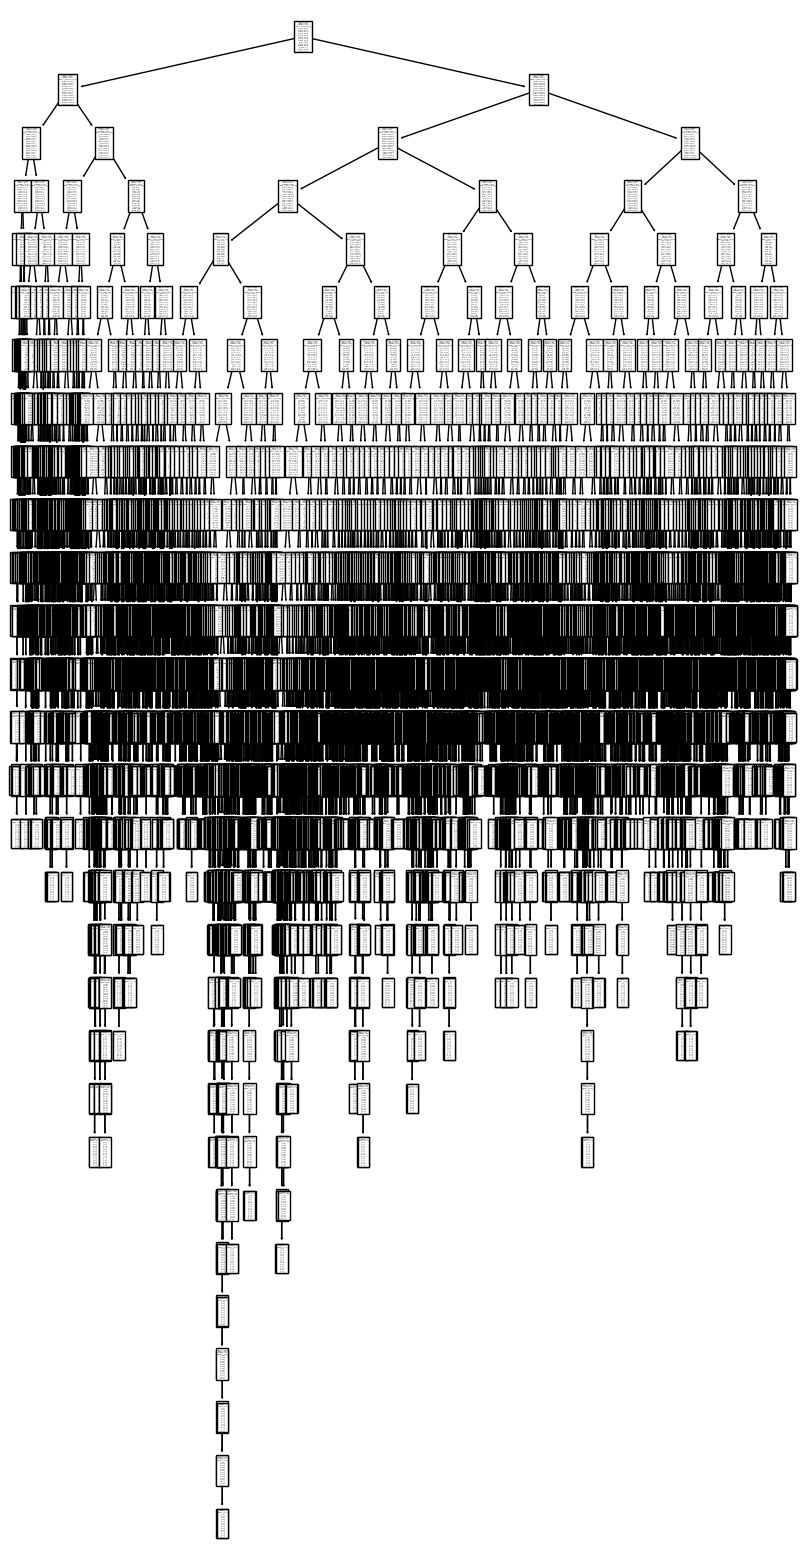

In [29]:
#Run Decision Tree classifier
activedt = DecisionTreeClassifier(criterion='gini', min_samples_split=2)
activedt.fit(X_train, y_train)
figure(figsize=(10,20))
tree.plot_tree(activedt)

In [33]:
#cross validation methody_pred_train = activedt.predict(X_train)
print('Train accuracy score: ',cross_val_score(activedt, X_train, y_train, cv = 3, scoring='accuracy').mean())

Train accuracy score:  0.6028926052402835


The accuracy score for the trained model is approximately 60%.

In [44]:
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier  # Example model

# Initialize the model (e.g., RandomForestClassifier)
model = RandomForestClassifier()

# Train your model (if you haven't already)
model.fit(X_train, y_train)  # Train the model on the training data

# Generate predictions on the training data
y_pred_train = model.predict(X_train)

# Now, generate the classification report
report = classification_report(y_train, y_pred_train)
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4565
           1       1.00      1.00      1.00      6431
           2       1.00      1.00      1.00      5970
           3       1.00      1.00      1.00      3581
           4       1.00      1.00      1.00      3959
           5       1.00      1.00      1.00      4024
           6       1.00      1.00      1.00      3031
           7       1.00      1.00      1.00      5147
           8       1.00      1.00      1.00      3833
           9       1.00      1.00      1.00      8214
          10       1.00      1.00      1.00      3815
          11       1.00      1.00      1.00      2904
          12       0.00      0.00      0.00         0
          13       1.00      1.00      1.00      3106
          14       1.00      1.00      1.00       946

   micro avg       1.00      1.00      1.00     59526
   macro avg       0.93      0.93      0.93     59526
weighted avg       1.00   

C:\Users\LocalAdmin\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\LocalAdmin\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\LocalAdmin\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\LocalAdmin\anacon

In [49]:
locations = list({x.split("_")[0] for x in df_og.columns if x not in ["MONTH", "DATE"]})
locations.sort()
print(locations)

['BASEL', 'BELGRADE', 'BUDAPEST', 'DEBILT', 'DUSSELDORF', 'HEATHROW', 'KASSEL', 'LJUBLJANA', 'MAASTRICHT', 'MADRID', 'MUNCHENB', 'OSLO', 'SONNBLICK', 'STOCKHOLM', 'VALENTIA']


C:\Users\LocalAdmin\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:386: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


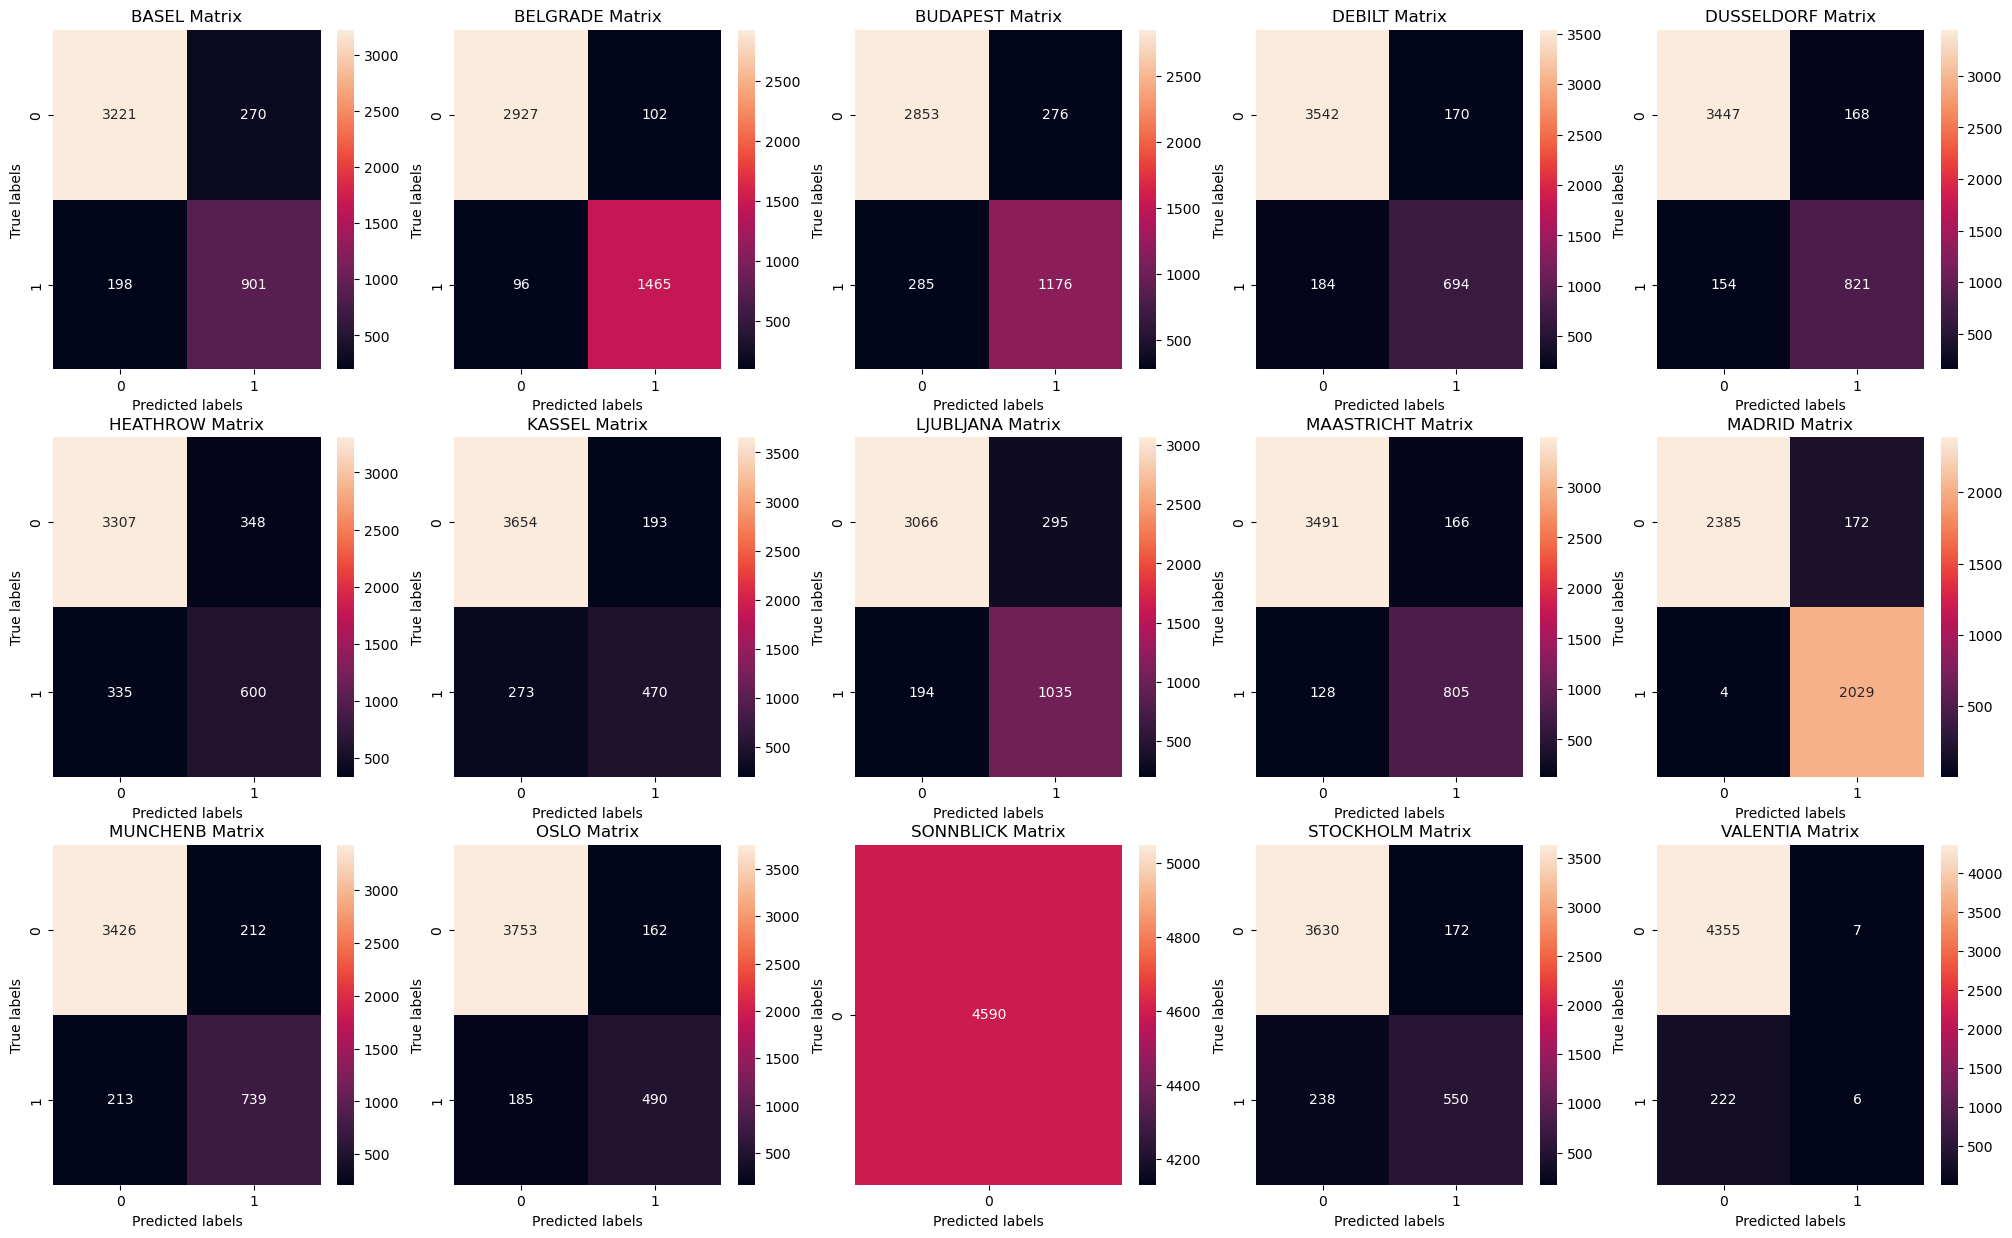

In [52]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Define and train the ANN model
mlp = MLPClassifier(hidden_layer_sizes=(10, 5, 8), max_iter=800, tol=0.00001)
mlp.fit(X_train, y_train)  # Train the model on your training data

# Step 2: Predict on the test data
y_pred_test = mlp.predict(X_test)  # Generate predictions for test data

# Step 3: Plot confusion matrices for each weather station
key = "_pleasant_weather"
figure, ax = plt.subplots(3, 5, figsize=(25, 15))
labels = ['pleasant', 'unpleasant']
count = 0

for i in range(3):
    for j in range(5):
        name = locations[count]
        
        # Ensure y_test and y_pred_test have compatible shapes
        cm = confusion_matrix(y_test.loc[:, name + key], y_pred_test[:, count])
        disp = ConfusionMatrixDisplay(confusion_matrix=cm)
        
        ax[i, j] = sns.heatmap(cm, annot=True, fmt='g', ax=ax[i, j])
        ax[i, j].set_xlabel('Predicted labels')
        ax[i, j].set_ylabel('True labels')
        ax[i, j].set_title(name + ' Matrix')
        
        # Optional: Customize tick labels
        # ax[i, j].xaxis.set_ticklabels(labels)
        # ax[i, j].yaxis.set_ticklabels(labels)
        
        count += 1